##Описание датасета

Датасет Boston Housing содержит 506 наблюдений о недвижимости в Бостоне с 14 признаками, включая демографические, экологические и инфраструктурные характеристики районов. Целевой переменной является медианная стоимость домов в тысячах долларов.

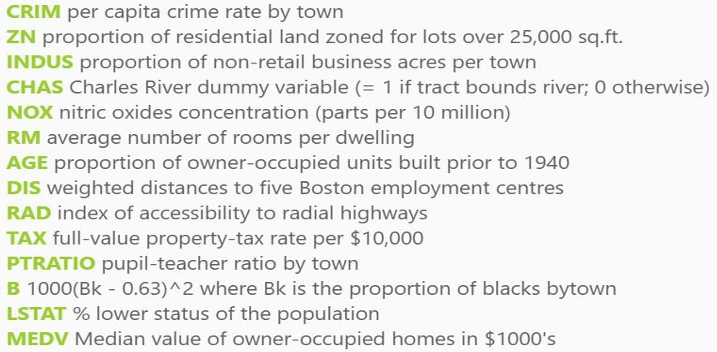

##Код

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import boston_housing
from sklearn.model_selection import KFold

print(" Загрузка датасета Boston Housing...")

# Загрузка данных
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data(seed=1728)

print(" Данные успешно загружены!")
print(f" Обучающая выборка: {train_data.shape}")
print(f" Тестовая выборка: {test_data.shape}")

# Создание DataFrame для анализа
feature_names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS",
                 "RAD", "TAX", "PTRATIO", "B", "LSTAT"]

train_df = pd.DataFrame(train_data, columns=feature_names)
test_df = pd.DataFrame(test_data, columns=feature_names)

print("\n Статистика обучающей выборки:")
print(train_df.describe())

# Нормализация данных
def normalize_data(train_data, test_data):
    mean = train_data.mean(axis=0)
    std = train_data.std(axis=0)

    train_data_normalized = (train_data - mean) / std
    test_data_normalized = (test_data - mean) / std

    return train_data_normalized, test_data_normalized, mean, std

# Применяем нормализацию
train_data_norm, test_data_norm, mean, std = normalize_data(train_data, test_data)

print("\n Данные нормализованы")


 Загрузка датасета Boston Housing...
 Данные успешно загружены!
 Обучающая выборка: (404, 13)
 Тестовая выборка: (102, 13)

 Статистика обучающей выборки:
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  404.000000  404.000000  404.000000  404.000000  404.000000  404.000000   
mean     3.918960   11.571782   11.298317    0.079208    0.557447    6.258213   
std      8.762284   23.970951    6.878957    0.270398    0.117009    0.692404   
min      0.006320    0.000000    0.740000    0.000000    0.385000    3.863000   
25%      0.082155    0.000000    5.190000    0.000000    0.449000    5.871750   
50%      0.289575    0.000000    9.900000    0.000000    0.538000    6.179000   
75%      4.253990   12.500000   18.100000    0.000000    0.631000    6.608500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  404.000000  404.000000  404

In [ ]:
#   СОЗДАНИЕ МОДЕЛИ (ВАРИАНТ 20)


def create_regression_model():
    """
    Создание регрессионной модели согласно варианту 20:
    - 4 скрытых слоя: 32-16-32-16 нейронов
    - Функции активации: relu-relu-relu-elu
    """
    model = Sequential()

    # Входной слой + первый скрытый слой: 32 нейрона, relu
    model.add(Dense(32, activation='relu', input_shape=(13,)))

    # Второй скрытый слой: 16 нейронов, relu
    model.add(Dense(16, activation='relu'))

    # Третий скрытый слой: 32 нейрона, relu
    model.add(Dense(32, activation='relu'))

    # Четвертый скрытый слой: 16 нейронов, elu
    model.add(Dense(16, activation='elu'))

    # Выходной слой: 1 нейрон, линейная активация (регрессия)
    model.add(Dense(1, activation='linear'))

    return model

# Создаем модель
model = create_regression_model()

print(" Архитектура модели (Вариант 20):")
model.summary()

# Компиляция модели
model.compile(
    optimizer='rmsprop',
    loss='mse',           # Среднеквадратическая погрешность
    metrics=['mae']       # Средняя абсолютная ошибка для мониторинга
)

print(" Модель скомпилирована")

 Архитектура модели (Вариант 20):


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_40 (Dense)                │ (None, 32)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,065 (8.07 KB)

 Trainable params: 2,065 (8.07 KB)

 Non-trainable params: 0 (0.00 B)

 Модель скомпилирована


In [ ]:
# КРОСС-ВАЛИДАЦИЯ

print("\n ВЫПОЛНЕНИЕ КРОСС-ВАЛИДАЦИИ...")

k = 5  # Количество блоков = количество слоев + 1 (4 + 1 = 5)
kf = KFold(n_splits=k, shuffle=True, random_state=42)

mae_scores = []
mse_scores = []
histories = []

for fold, (train_idx, val_idx) in enumerate(kf.split(train_data_norm)):
    print(f"\n Блок {fold + 1}/{k}")

    # Разделение данных
    X_train_fold = train_data_norm[train_idx]
    y_train_fold = train_labels[train_idx]
    X_val_fold = train_data_norm[val_idx]
    y_val_fold = train_labels[val_idx]

    # Создание и обучение модели для текущего блока
    fold_model = create_regression_model()
    fold_model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

    history = fold_model.fit(
        X_train_fold, y_train_fold,
        epochs=200,
        batch_size=32,
        validation_data=(X_val_fold, y_val_fold),
        verbose=0
    )

    # Оценка на валидационных данных
    val_loss, val_mae = fold_model.evaluate(X_val_fold, y_val_fold, verbose=0)
    mae_scores.append(val_mae)
    mse_scores.append(val_loss)
    histories.append(history)

    print(f"   MAE: {val_mae:.4f}, MSE: {val_loss:.4f}")

# Результаты кросс-валидации
print(f"\n РЕЗУЛЬТАТЫ КРОСС-ВАЛИДАЦИИ ({k} блока):")
print(f"   Средний MAE: {np.mean(mae_scores):.4f} (+/- {np.std(mae_scores):.4f})")
print(f"   Средний MSE: {np.mean(mse_scores):.4f}")


 ВЫПОЛНЕНИЕ КРОСС-ВАЛИДАЦИИ...

 Блок 1/5
   MAE: 2.6229, MSE: 11.9294

 Блок 2/5
   MAE: 2.7453, MSE: 25.6270

 Блок 3/5
   MAE: 2.3372, MSE: 7.7536

 Блок 4/5
   MAE: 2.3076, MSE: 8.6306

 Блок 5/5
   MAE: 2.5263, MSE: 12.7930

 РЕЗУЛЬТАТЫ КРОСС-ВАЛИДАЦИИ (5 блока):
   Средний MAE: 2.5079 (+/- 0.1668)
   Средний MSE: 13.3467


In [ ]:
# ОБУЧЕНИЕ ФИНАЛЬНОЙ МОДЕЛИ

print("\n ОБУЧЕНИЕ ФИНАЛЬНОЙ МОДЕЛИ НА ВСЕХ ДАННЫХ...")

# Обучение на всей обучающей выборке
final_history = model.fit(
    train_data_norm, train_labels,
    epochs=200,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


 ОБУЧЕНИЕ ФИНАЛЬНОЙ МОДЕЛИ НА ВСЕХ ДАННЫХ...
Epoch 1/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 575.3215 - mae: 22.2485 - val_loss: 554.3655 - val_mae: 21.4575
Epoch 2/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 484.7253 - mae: 20.1714 - val_loss: 479.3206 - val_mae: 19.6743
Epoch 3/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 415.7833 - mae: 18.3892 - val_loss: 392.6622 - val_mae: 17.5247
Epoch 4/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 337.6306 - mae: 16.2221 - val_loss: 297.1292 - val_mae: 14.8797
Epoch 5/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 247.2124 - mae: 13.3781 - val_loss: 204.7850 - val_mae: 12.0134
Epoch 6/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 168.5402 - mae: 10.6944 - val_loss: 127.0563 - val_mae: 9.0877
Epoch 7/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 100.0460 - mae: 7.9595 - val_loss: 79.3345 - val_mae: 6.9530
Epoch 8/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 59.9336 - mae: 6.1511 - val_lo

In [ ]:
# ОЦЕНКА НА ТЕСТОВЫХ ДАННЫХ

print("\n ОЦЕНКА НА ТЕСТОВЫХ ДАННЫХ...")

test_loss, test_mae = model.evaluate(test_data_norm, test_labels, verbose=0)

print(f" Результаты на тестовых данных:")
print(f"   Среднеквадратическая ошибка (MSE): {test_loss:.4f}")
print(f"   Средняя абсолютная ошибка (MAE): {test_mae:.4f}")
print(f"    Это означает: модель ошибается в среднем на ${test_mae * 1000:.0f}")


 ОЦЕНКА НА ТЕСТОВЫХ ДАННЫХ...
 Результаты на тестовых данных:
   Среднеквадратическая ошибка (MSE): 12.4518
   Средняя абсолютная ошибка (MAE): 2.4257
    Это означает: модель ошибается в среднем на $2426



 ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ...


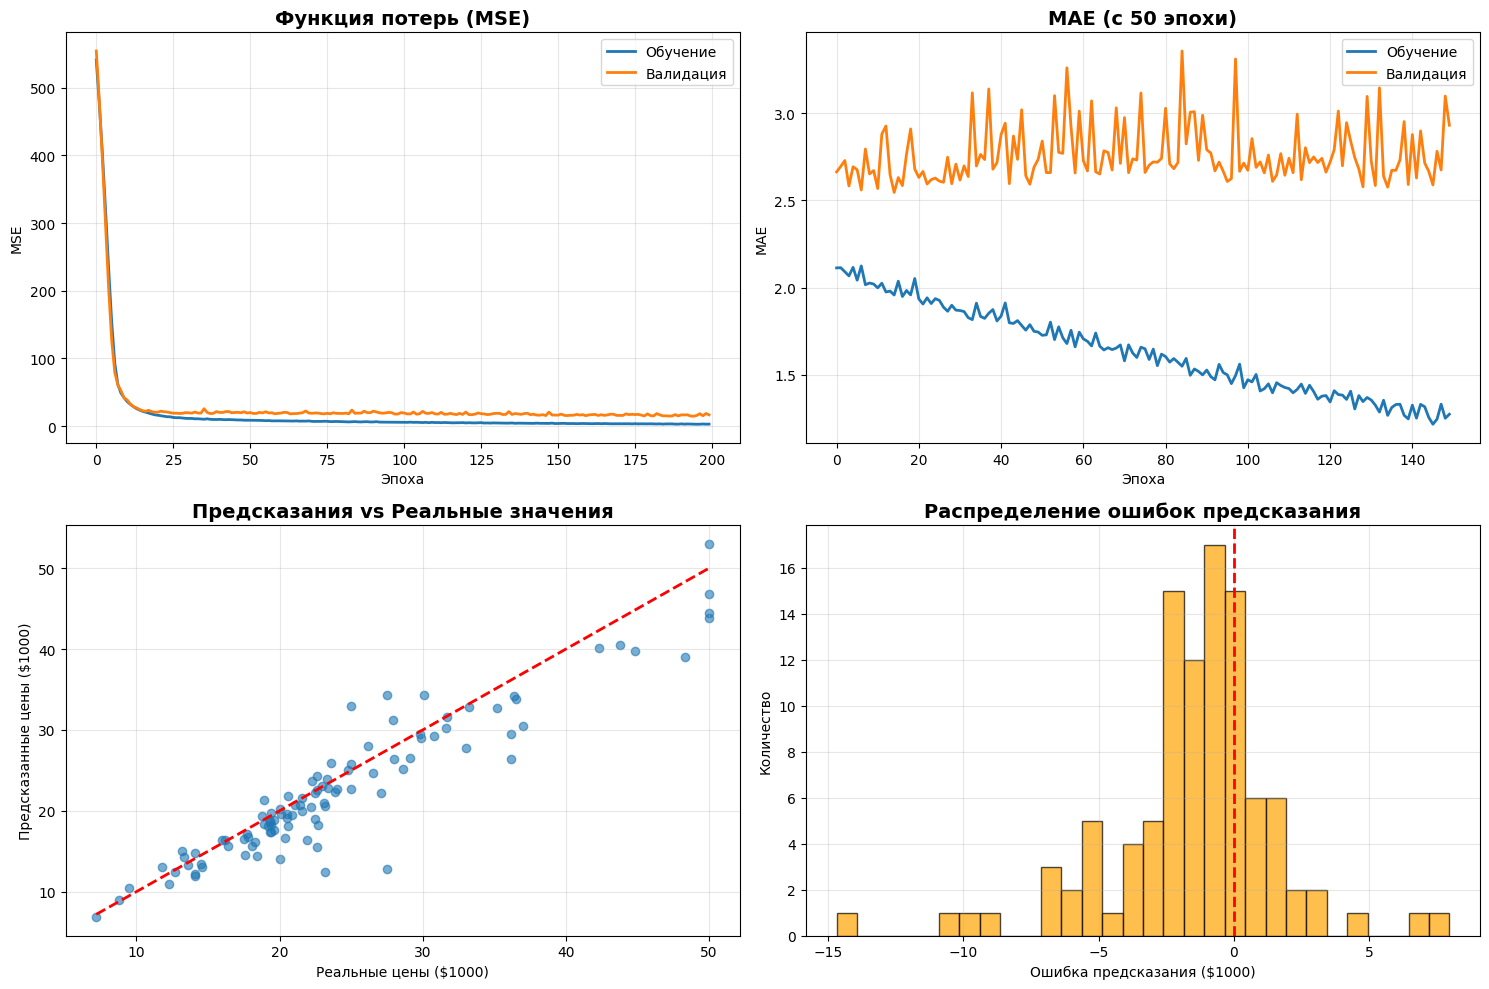

In [ ]:
# ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ

print("\n ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ...")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. График потерь при обучении
axes[0, 0].plot(final_history.history['loss'], label='Обучение', linewidth=2)
axes[0, 0].plot(final_history.history['val_loss'], label='Валидация', linewidth=2)
axes[0, 0].set_title('Функция потерь (MSE)', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Эпоха')
axes[0, 0].set_ylabel('MSE')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. График MAE при обучении (обрезаем как в примере)
axes[0, 1].plot(final_history.history['mae'][50:], label='Обучение', linewidth=2)
axes[0, 1].plot(final_history.history['val_mae'][50:], label='Валидация', linewidth=2)
axes[0, 1].set_title('MAE (с 50 эпохи)', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Эпоха')
axes[0, 1].set_ylabel('MAE')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Сравнение предсказаний с реальными значениями
predictions = model.predict(test_data_norm, verbose=0).flatten()

axes[1, 0].scatter(test_labels, predictions, alpha=0.6)
axes[1, 0].plot([test_labels.min(), test_labels.max()],
                [test_labels.min(), test_labels.max()], 'r--', lw=2)
axes[1, 0].set_title('Предсказания vs Реальные значения', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Реальные цены ($1000)')
axes[1, 0].set_ylabel('Предсказанные цены ($1000)')
axes[1, 0].grid(True, alpha=0.3)

# 4. Распределение ошибок
errors = predictions - test_labels
axes[1, 1].hist(errors, bins=30, alpha=0.7, color='orange', edgecolor='black')
axes[1, 1].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[1, 1].set_title('Распределение ошибок предсказания', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Ошибка предсказания ($1000)')
axes[1, 1].set_ylabel('Количество')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [ ]:
# ПРИМЕР ПРЕДСКАЗАНИЯ


print("\n ПРИМЕР ПРЕДСКАЗАНИЯ НА ТЕСТОВЫХ ДАННЫХ:")

# Выбираем случайный пример из тестовой выборки
sample_index = 4
sample_features = test_data_norm[sample_index]
true_price = test_labels[sample_index]

# Предсказание
predicted_price = model.predict(np.array([sample_features]), verbose=0)[0, 0]

print(f" Пример #{sample_index}:")
print(f"   Реальная цена: ${true_price:.1f}к")
print(f"   Предсказанная цена: ${predicted_price:.1f}к")
print(f"   Ошибка: ${abs(predicted_price - true_price):.2f}к")
print(f"   Относительная ошибка: {abs(predicted_price - true_price) / true_price * 100:.1f}%")


 ПРИМЕР ПРЕДСКАЗАНИЯ НА ТЕСТОВЫХ ДАННЫХ:
 Пример #4:
   Реальная цена: $21.6к
   Предсказанная цена: $20.0к
   Ошибка: $1.63к
   Относительная ошибка: 7.6%


In [ ]:
#  АНАЛИЗ РЕЗУЛЬТАТОВ


print("\n" + "="*60)
print(" АНАЛИЗ РЕЗУЛЬТАТОВ")
print("="*60)

print(" АРХИТЕКТУРА МОДЕЛИ:")
print("   • 4 скрытых слоя: 32-16-32-16 нейронов")
print("   • Функции активации: relu-relu-relu-elu")
print("   • Выход: 1 нейрон с линейной активацией")
print("   • Функция потерь: Среднеквадратическая погрешность (MSE)")

print(f"\n МЕТРИКИ КАЧЕСТВА:")
print(f"   • MAE на тесте: {test_mae:.4f} (ошибка ~${test_mae * 1000:.0f})")
print(f"   • MSE на тесте: {test_loss:.4f}")

# Анализ переобучения
final_train_mae = final_history.history['mae'][-1]
final_val_mae = final_history.history['val_mae'][-1]
overfitting_gap = final_train_mae - final_val_mae

print(f"\n АНАЛИЗ ПЕРЕОБУЧЕНИЯ:")
print(f"   • MAE на обучении: {final_train_mae:.4f}")
print(f"   • MAE на валидации: {final_val_mae:.4f}")
print(f"   • Разница: {overfitting_gap:.4f}")

if abs(overfitting_gap) < 0.5:
    print("    Переобучение минимальное")
else:
    print("    Обнаружено переобучение")

print(f"\n ВЫВОД:")
print(f"   Модель с архитектурой 32-16-32-16 и активациями relu-relu-relu-elu")
print(f"   показывает среднюю ошибку ${test_mae * 1000:.0f} при прогнозировании")
print(f"   цен на жилье в Бостоне.")

print("\n" + "="*60)


 АНАЛИЗ РЕЗУЛЬТАТОВ
 АРХИТЕКТУРА МОДЕЛИ:
   • 4 скрытых слоя: 32-16-32-16 нейронов
   • Функции активации: relu-relu-relu-elu
   • Выход: 1 нейрон с линейной активацией
   • Функция потерь: Среднеквадратическая погрешность (MSE)

 МЕТРИКИ КАЧЕСТВА:
   • MAE на тесте: 2.4257 (ошибка ~$2426)
   • MSE на тесте: 12.4518

 АНАЛИЗ ПЕРЕОБУЧЕНИЯ:
   • MAE на обучении: 1.2742
   • MAE на валидации: 2.9306
   • Разница: -1.6564
    Обнаружено переобучение

 ВЫВОД:
   Модель с архитектурой 32-16-32-16 и активациями relu-relu-relu-elu
   показывает среднюю ошибку $2426 при прогнозировании
   цен на жилье в Бостоне.



In [ ]:
# ШАГ 9: СРАВНЕНИЕ С БАЗОВОЙ МОДЕЛЬЮ

# Базовая модель (2 слоя, 64-64, relu-relu)
base_model = Sequential()
base_model.add(Dense(64, activation='relu', input_shape=(13,)))
base_model.add(Dense(64, activation='relu'))
base_model.add(Dense(1, activation='linear'))

base_model.compile(
    optimizer='rmsprop',
    loss='mse',
    metrics=['mae']
)

print("Обучаем базовую модель...")
base_history = base_model.fit(
    train_data_norm, train_labels,
    epochs=200,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Оценка базовой модели
base_test_loss, base_test_mae = base_model.evaluate(test_data_norm, test_labels, verbose=0)

print("\n" + "="*50)
print("СРАВНЕНИЕ РЕЗУЛЬТАТОВ:")
print("="*50)
print(f"Ваша модель (4 слоя, 32-16-32-16, relu-relu-relu-elu): MAE = {test_mae:.4f}")
print(f"Базовая модель (2 слоя, 64-64, relu-relu): MAE = {base_test_mae:.4f}")

Обучаем базовую модель...
Epoch 1/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 509.3310 - mae: 20.7691 - val_loss: 518.6270 - val_mae: 20.4632
Epoch 2/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 447.8320 - mae: 19.1285 - val_loss: 446.3529 - val_mae: 18.6644
Epoch 3/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 373.9760 - mae: 16.9969 - val_loss: 361.9100 - val_mae: 16.6031
Epoch 4/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 305.9755 - mae: 14.9282 - val_loss: 280.0542 - val_mae: 14.3522
Epoch 5/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 222.6611 - mae: 12.8147 - val_loss: 200.1423 - val_mae: 11.7933
Epoch 6/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 162.1279 - mae: 10.4829 - val_loss: 137.6663 - val_mae: 9.3511
Epoch 7/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 119.7030 - mae: 8.5176 - val_loss: 99.3342 - val_mae: 7.9460
Epoch 8/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 92.7209 - mae: 7.1643 - val_loss: 73.8359 - val_mae: 6